In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import PySulfSat as ss

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
M.__version__

'0.1.9dev'

In [3]:
Exp = pd.read_excel('NeaveExperiments\Villiger2007.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']

In [4]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[0], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[0], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[0], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[0], 
        'MnO_Liq': Exp['MnO_Liq'].loc[0], 
        'MgO_Liq': Exp['MgO_Liq'].loc[0], 
        'CaO_Liq': Exp['CaO_Liq'].loc[0], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[0], 
        'K2O_Liq': Exp['K2O_Liq'].loc[0],
        'Cr2O3_Liq': 0.0,
        'P2O5_Liq': 0.0,
        'H2O_Liq': 0.2, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.15}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17
bulk

{'SiO2_Liq': 48.67,
 'TiO2_Liq': 0.57,
 'Al2O3_Liq': 14.55,
 'FeOt_Liq': 7.56,
 'MnO_Liq': 0.14,
 'MgO_Liq': 14.81,
 'CaO_Liq': 11.73,
 'Na2O_Liq': 1.5,
 'K2O_Liq': 0.08,
 'Cr2O3_Liq': 0.0,
 'P2O5_Liq': 0.0,
 'H2O_Liq': 0.2,
 'CO2_Liq': 0.0,
 'Fe3Fet_Liq': 0.15}

In [5]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(8,1)

In [13]:
P_bar = np.array([1000,4000,7000,10000])

Results_Holland = M.multi_path(Model = "Holland", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2, Frac_solid = True,
                              timeout = 600)

# Results_MELTS = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
#                        T_end_C = 1000, dt_C = 2, 
#                        P_bar = P_bar, find_liquidus = True,
#                        H2O_Liq = 0.2,
#                        Frac_solid = True, Frac_fluid = True,
#                       fO2_buffer = "NNO", fO2_offset = 0)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Holland calculations 0 to 3.0 ... Complete (time taken = 281.71 seconds)
dict_keys(['index = 1', 'index = 2', 'index = 0', 'index = 3'])


In [14]:
import pickle
# with open('Results_Holland.pck', 'rb') as f:
#     Results_Holland = pickle.load(f)
    
with open('Results_MELTS.pck', 'rb') as f:
    Results_MELTS = pickle.load(f)

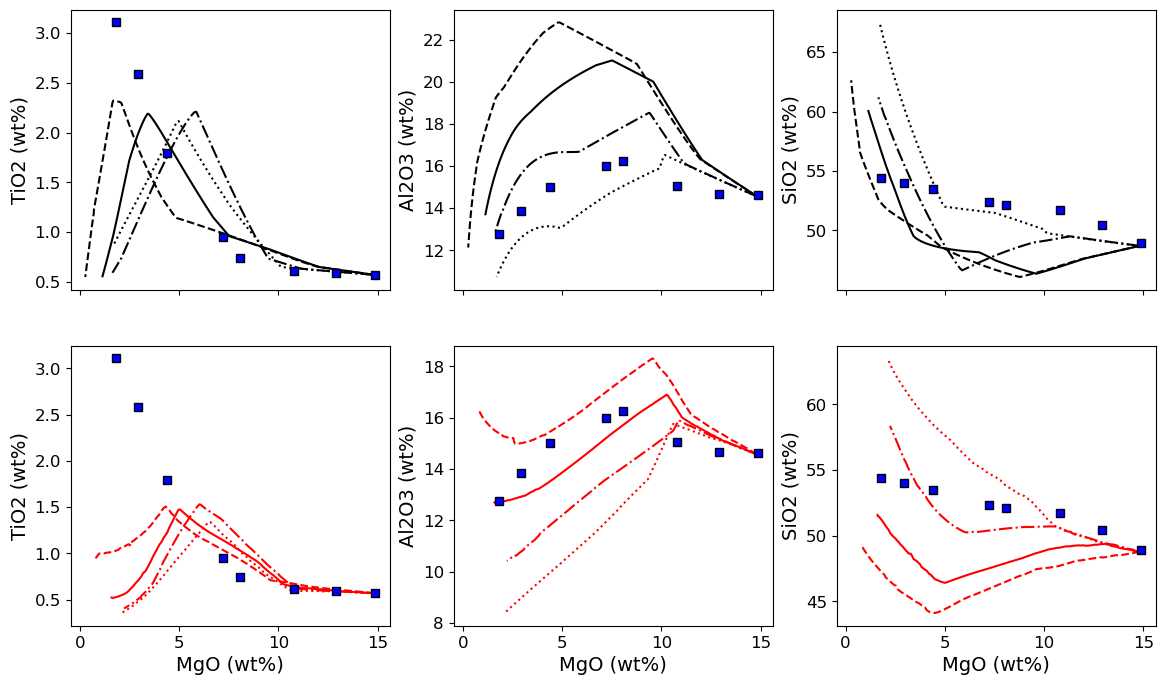

In [17]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

#for index in Results_Holland:
    #Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2_Liq']),1)
    #Results_MELTS[index]['All'][Elements] = 100*Results_MELTS[index]['All'][Elements].values/np.nansum(Results_MELTS[index]['All'][Elements], axis = 1).reshape(len(Results_MELTS[index]['All']['SiO2_Liq']),1)

lines = [':', '-', '--', '-.']    

for i in range(3):
    # for j in range(len(P_bar)):
    #     a[0][i].plot(Results_Holland['index = ' + str(int(j))]['liq']['MgO_Liq'],
    #          Results_Holland['index = ' + str(int(j))]['liq'][y[i]], lines[j], linewidth = 2, color = 'r')  
    #     a[1][i].plot(Results_MELTS['index = ' + str(int(j))]['All']['MgO_Liq'],
    #          Results_MELTS['index = ' + str(int(j))]['All'][y[i]], lines[j], linewidth = 2, color = 'k')
    
    a[0][i].plot(Results_MELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTS['index = 0']['liquid1'][y[i]], ':', color = 'k')
    a[0][i].plot(Results_MELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTS['index = 1']['liquid1'][y[i]], '-.', color = 'k')
    a[0][i].plot(Results_MELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTS['index = 2']['liquid1'][y[i]], '-', color = 'k')
    a[0][i].plot(Results_MELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTS['index = 3']['liquid1'][y[i]], '--', color = 'k')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].plot(100*Results_Holland['index = 0']['liq']['MgO'],
                100*Results_Holland['index = 0']['liq'][y[i][:-4]], ':', color = 'r')
    a[1][i].plot(100*Results_Holland['index = 1']['liq']['MgO'],
                100*Results_Holland['index = 1']['liq'][y[i][:-4]], '-.', color = 'r')
    a[1][i].plot(100*Results_Holland['index = 2']['liq']['MgO'],
                100*Results_Holland['index = 2']['liq'][y[i][:-4]], '-', color = 'r')
    a[1][i].plot(100*Results_Holland['index = 3']['liq']['MgO'],
                100*Results_Holland['index = 3']['liq'][y[i][:-4]], '--', color = 'r')    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].set_xlabel('MgO (wt%)')
    
#plt.savefig("Villiger.eps", dpi = 300, bbox_inches='tight')  

In [9]:
Results_Holland

{'index = 2': {'pl4T':          SiO2     Al2O3       CaO  MgO  FeO       K2O      Na2O  TiO2    O   
  0    0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0  0.0  \
  1    0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0  0.0   
  2    0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0  0.0   
  3    0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0  0.0   
  4    0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0  0.0   
  ..        ...       ...       ...  ...  ...       ...       ...   ...  ...   
  188  0.494183  0.324491  0.152395  0.0  0.0  0.000306  0.028625   0.0  0.0   
  189  0.494143  0.324519  0.152427  0.0  0.0  0.000304  0.028607   0.0  0.0   
  190  0.494100  0.324548  0.152461  0.0  0.0  0.000303  0.028588   0.0  0.0   
  191  0.494058  0.324577  0.152494  0.0  0.0  0.000301  0.028570   0.0  0.0   
  192  0.494015  0.324606  0.152528  0.0  0.0  0.000300  0.028551   0.0  0.0   
  
       Cr2O3  H2

In [6]:
bulk['Cr2O3_Liq'] = 0.01
bulk['Fe3Fet_Liq'] = 0.15
import pyMAGEMINcalc as MM
MM.__version__

'0.0.4dev2'

In [7]:
bulk['Fe3Fet_Liq']*(((159.59/2)/71.844)*bulk['FeOt_Liq'] - bulk['FeOt_Liq'])

0.12550016702856195

In [11]:
Result = MM.path(comp = bulk, T_end_C = 1000, dt_C = 5, P_bar = 10000, find_liquidus = True, Frac_solid = True)

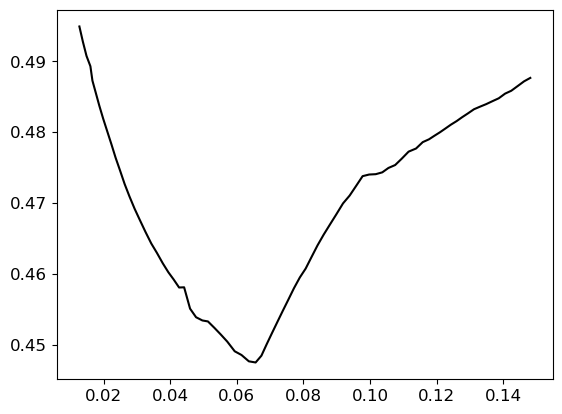

In [14]:
f, a = plt.subplots(1,1)
a.plot(Result['liq']['MgO'], Result['liq']['SiO2'], '-k')

In [16]:
MM.findLiq(P_bar = 10000, T_C_init = 1400, comp = bulk, fO2_buffer = "NNO", fO2_offset = 0.0)

0

In [17]:
bulk

{'SiO2_Liq': 48.67,
 'TiO2_Liq': 0.57,
 'Al2O3_Liq': 14.55,
 'FeOt_Liq': 7.56,
 'MnO_Liq': 0.14,
 'MgO_Liq': 14.81,
 'CaO_Liq': 11.73,
 'Na2O_Liq': 1.5,
 'K2O_Liq': 0.08,
 'P2O5_Liq': 0.0,
 'H2O_Liq': 0.2,
 'CO2_Liq': 0.0,
 'Fe3Fet_Liq': 0.15,
 'Cr2O3_Liq': 0.0001}